In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os
from collections import OrderedDict

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import palettable

from starfisher.plots import plot_hess
from starfisher.pipeline import show_fit, show_sfh, show_sfh_line

In [3]:
from starfisher.pipeline import PipelineBase
from androcmd.planes import BasicPhatPlanes
from androcmd.phatpipeline import (
    ExtendedSolarIsocs, ExtendedSolarLockfile,
    NoDust, PhatCrowding)
from androcmd.phatpipeline import PhatCatalog

brick = 23
dataset = PhatCatalog(brick)

def init_pipeline(brick):
    pipeline = Pipeline(root_dir="b{0:d}_threez".format(brick),
                        isoc_args=dict(isoc_kind='parsec_CAF09_v1.2S',
                                       photsys_version='yang'))
    pipeline.fit('f475w_f160w', ['f475w_f160w'], dataset)
    # pipeline.fit('rgb', ['f475w_f814w_rgb'], dataset)
    pipeline.fit('ms', ['f475w_f814w_ms'], dataset)
    return pipeline


class Pipeline(BasicPhatPlanes,
               ExtendedSolarIsocs, ExtendedSolarLockfile,
               NoDust, PhatCrowding, PipelineBase):
    """A pipeline for fitting PHAT bricks with solar metallicity isochrones."""
    def __init__(self, **kwargs):
        print "MultiZPhatPipeline", kwargs
        super(Pipeline, self).__init__(**kwargs)

DatasetBase {}


In [4]:
p = init_pipeline(brick)

MultiZPhatPipeline {'root_dir': 'b23_threez', 'isoc_args': {'photsys_version': 'yang', 'isoc_kind': 'parsec_CAF09_v1.2S'}}
BasicPhatPlanes {'root_dir': 'b23_threez', 'isoc_args': {'photsys_version': 'yang', 'isoc_kind': 'parsec_CAF09_v1.2S'}}
PlaneBase {'root_dir': 'b23_threez', 'isoc_args': {'photsys_version': 'yang', 'isoc_kind': 'parsec_CAF09_v1.2S'}}
ExtendedSolarZIsocs {'root_dir': 'b23_threez'}
IsochroneSetBase {'root_dir': 'b23_threez'}
ExtendedSolarLockfile {'root_dir': 'b23_threez'}
LockBase {'root_dir': 'b23_threez'}
PipelineBase {}
b23_threez/isoc b23_threez/lib b23_threez/synth
Running ExtendedSolarIsocs setup_isochrones
self.builder.full_isofile_path /Users/jsick/code/_starfish/starfish/b23_threez/lib/isofile
/Users/jsick/phat_data


## Fitting the entire Hess Plane

/Users/jsick/code/_starfish/starfisher/starfisher/pipeline.py:323: RuntimeWarning: divide by zero encountered in divide
  chi = ((obs_hess.hess - fit_hess.hess) / sigma) ** 2.
/Users/jsick/code/_starfish/starfisher/starfisher/pipeline.py:323: RuntimeWarning: invalid value encountered in divide
  chi = ((obs_hess.hess - fit_hess.hess) / sigma) ** 2.
/Users/jsick/code/_starfish/starfisher/starfisher/plots.py:47: RuntimeWarning: divide by zero encountered in log10
  hess = np.log10(hess)
/Users/jsick/.virtualenvs/starfish/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


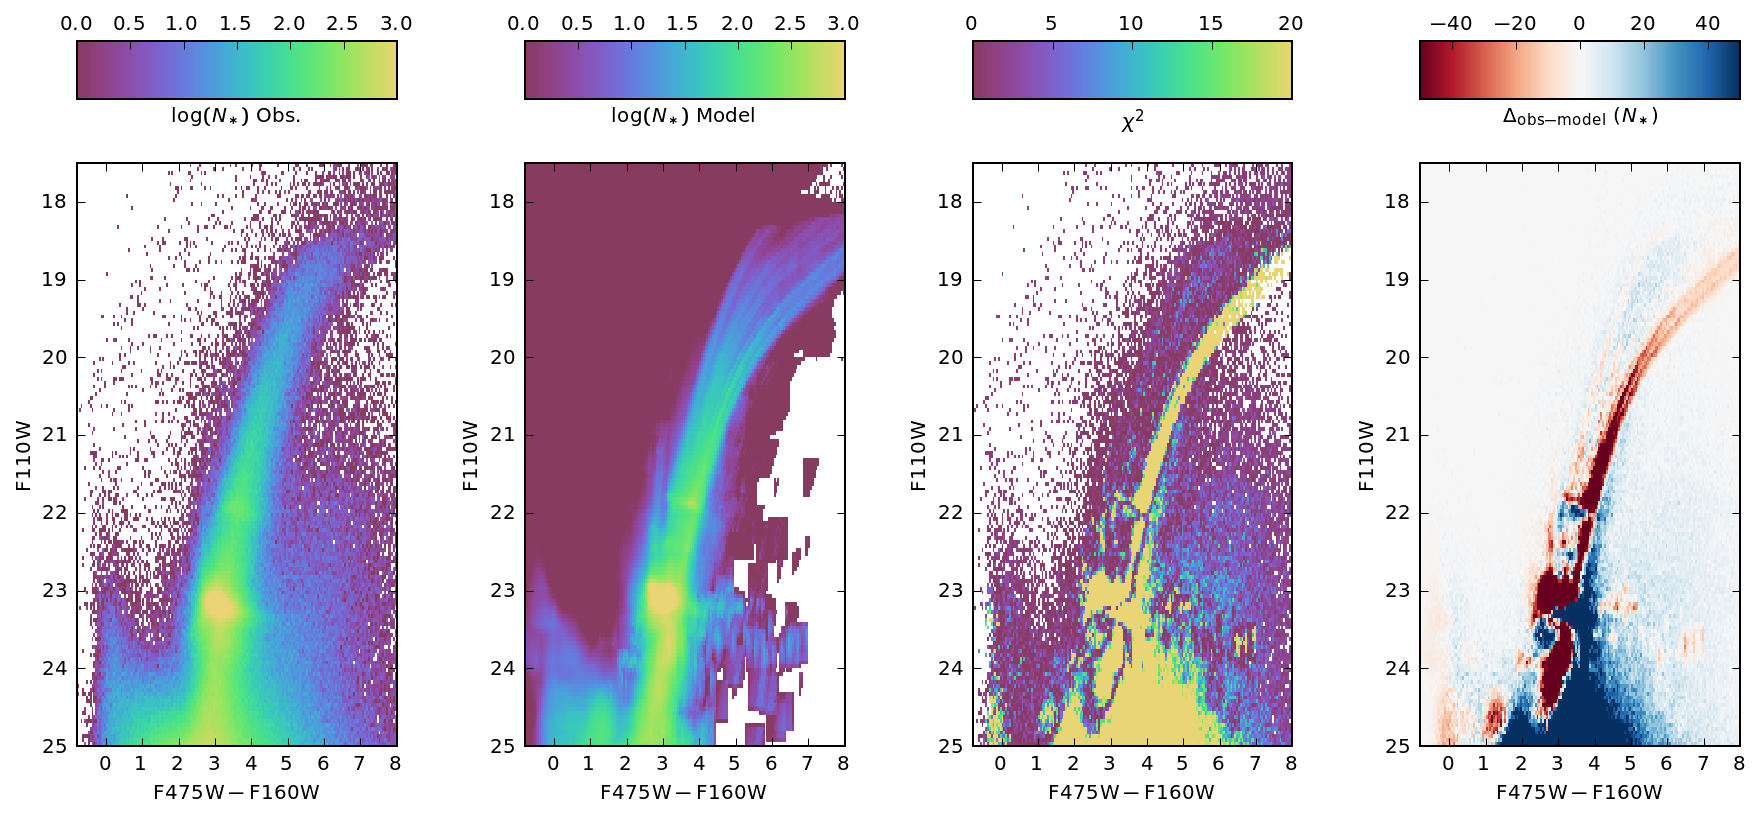

In [5]:
show_fit(p, dataset, 'f475w_f160w', 'f475w_f160w')

The RGB is still being fit poorly.

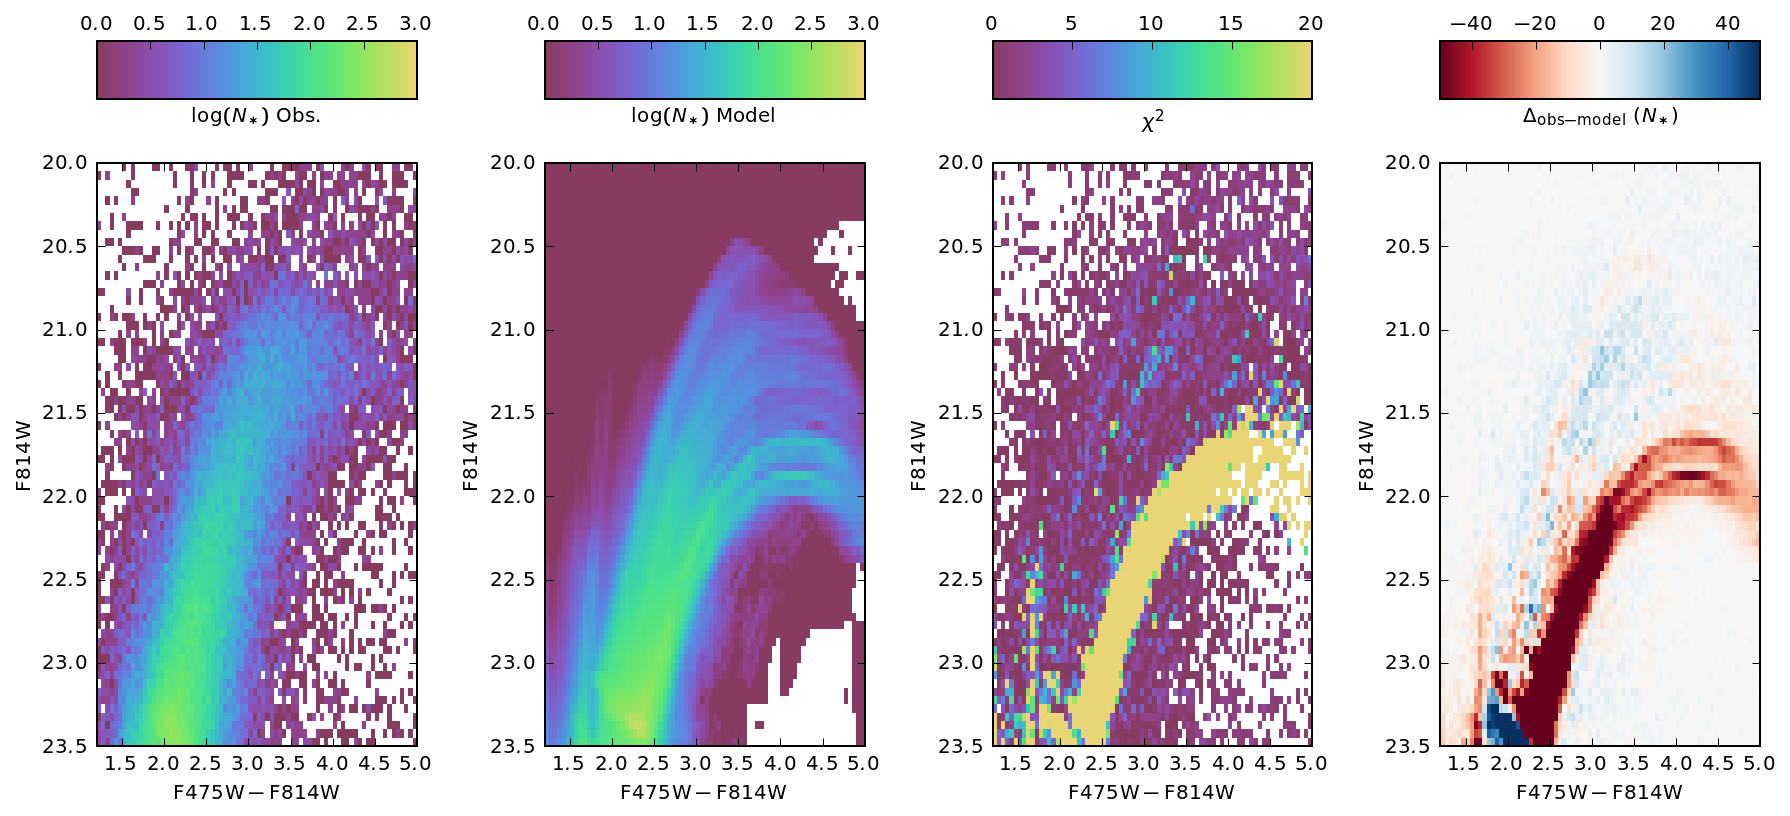

In [7]:
show_fit(p, dataset, 'f475w_f160w', 'f475w_f814w_rgb')

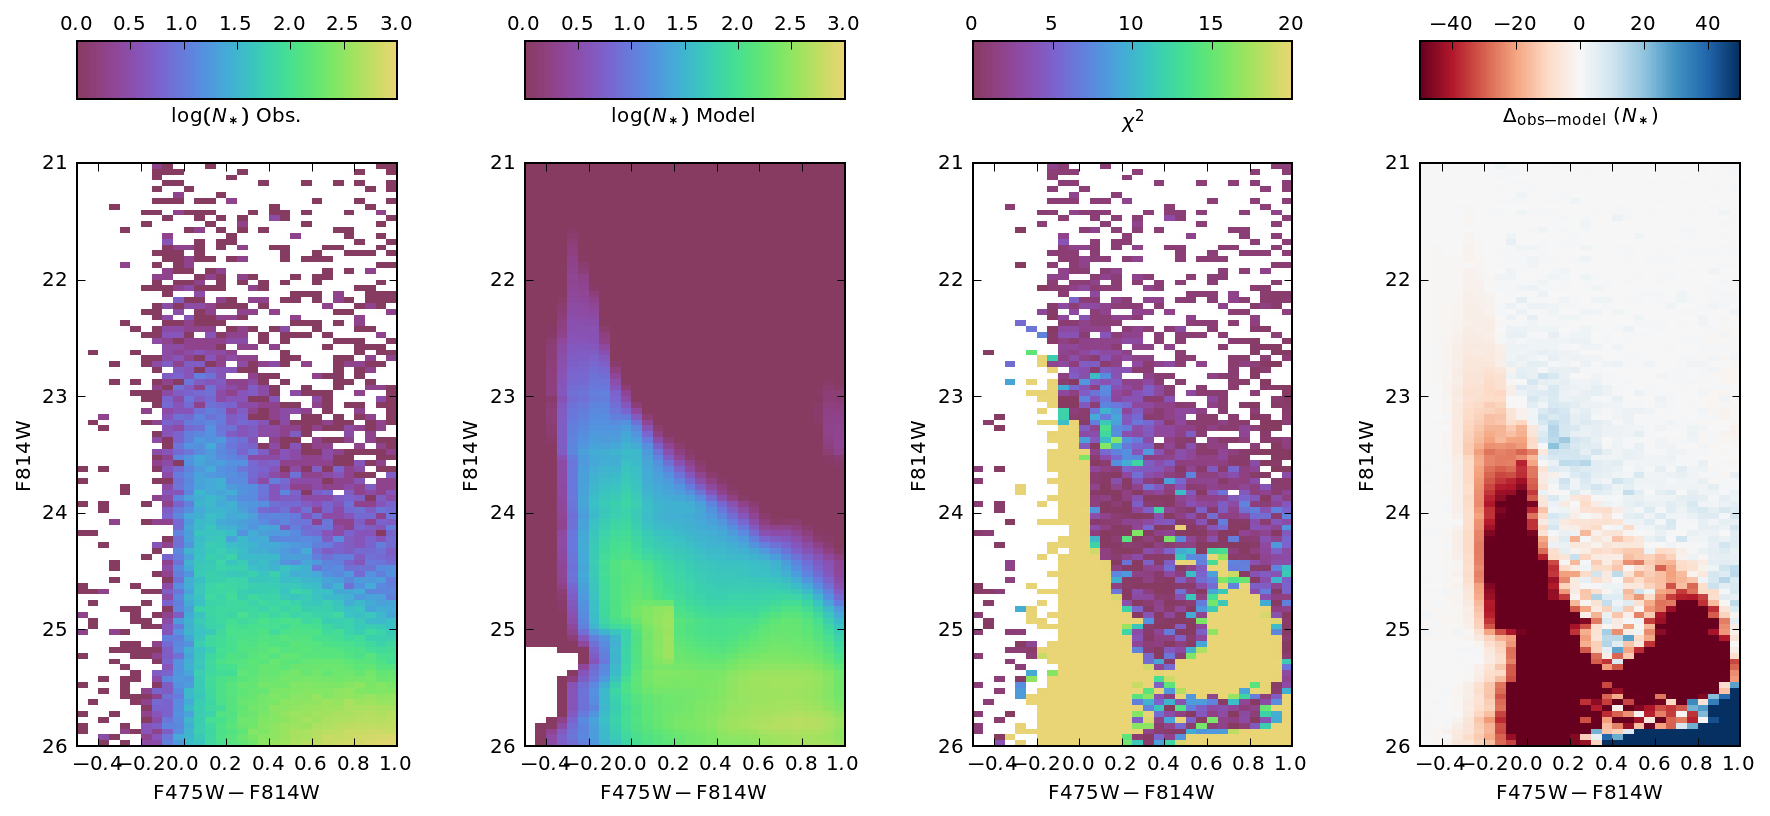

In [8]:
show_fit(p, dataset, 'f475w_f160w', 'f475w_f814w_ms')

## Fitting the Main Sequence

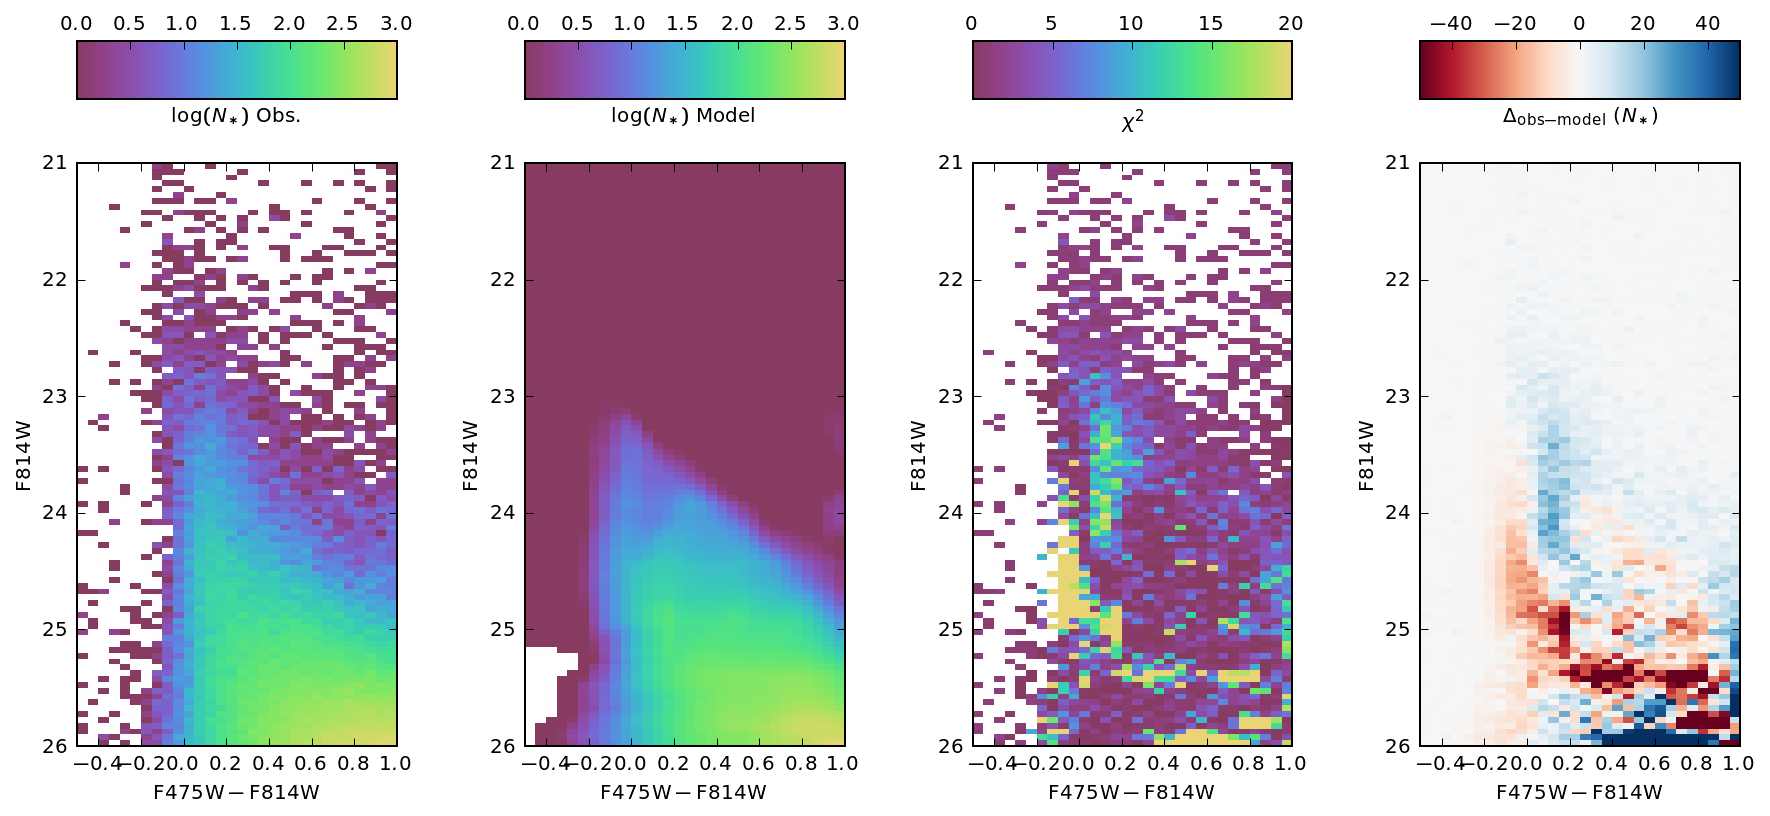

In [9]:
show_fit(p, dataset, 'ms', 'f475w_f814w_ms')

Extrapolated to the full Hess plane, this fit is entirely wrong.

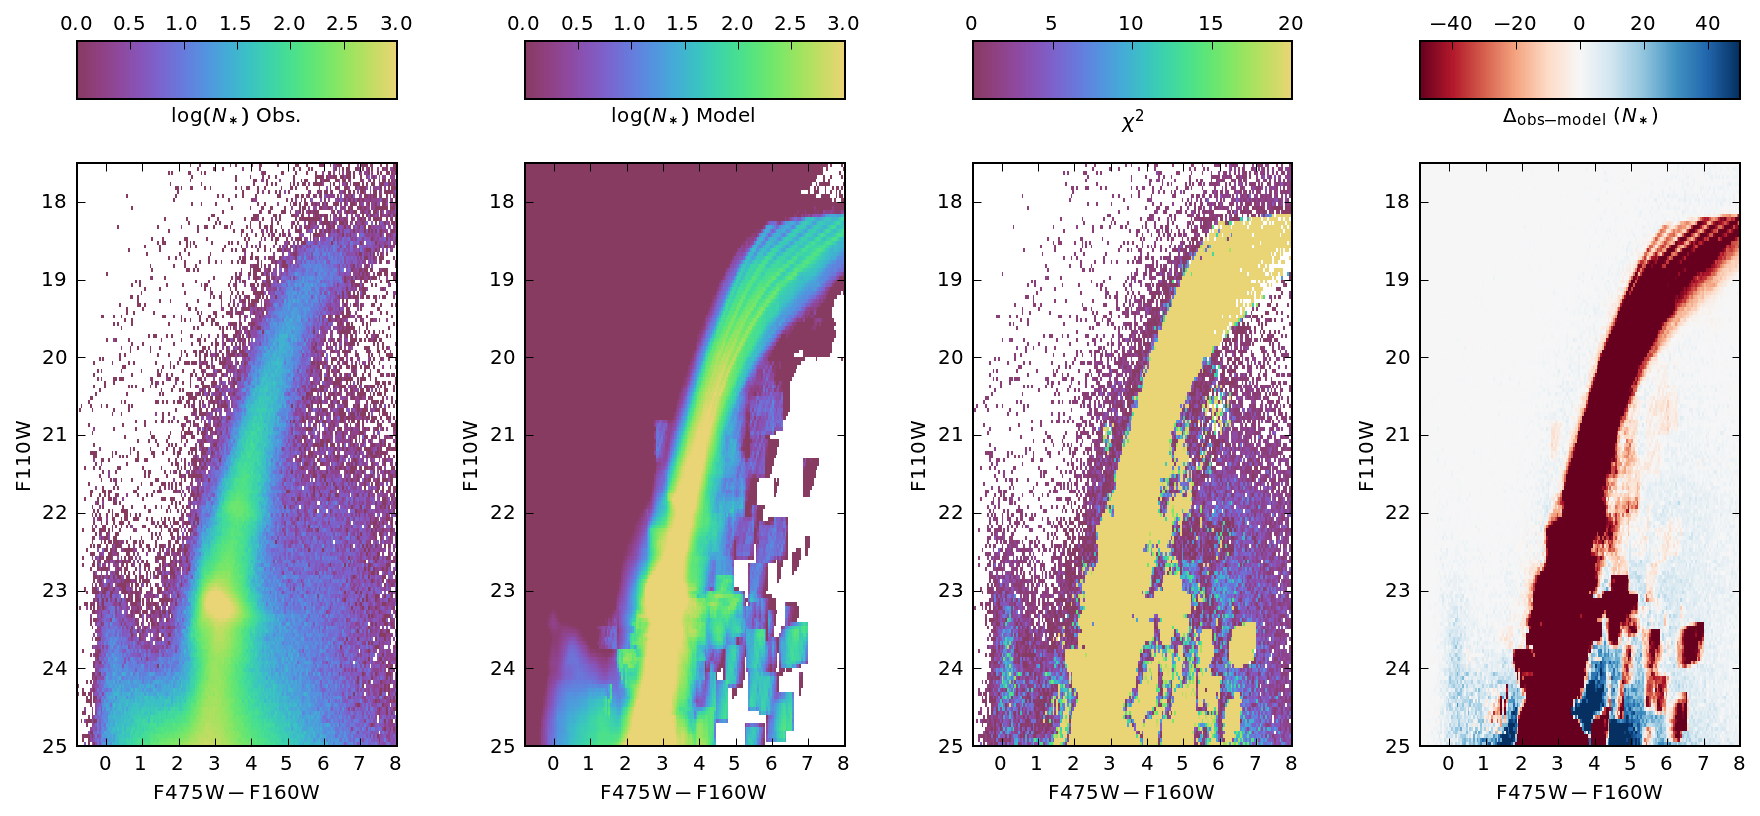

In [10]:
show_fit(p, dataset, 'ms', 'f475w_f160w')